In [1]:
#importing the required Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#importing the dataset
data=pd.read_csv('monthly-car-sales-in-quebec-1960.csv',index_col='Month')
data.tail()

,Monthly car sales in Quebec 1960-1968
Month,
1968-09,14385.0
1968-10,21342.0
1968-11,17180.0
1968-12,14577.0
Monthly car sales in Quebec 1960-1968,NaN


In [7]:
#Removing the last row
data.drop('Monthly car sales in Quebec 1960-1968',axis=0,inplace=True)
data.tail()

,Monthly car sales in Quebec 1960-1968
Month,
1968-08,16722.0
1968-09,14385.0
1968-10,21342.0
1968-11,17180.0
1968-12,14577.0


In [8]:
#Converting the datatype of the index column to the datetime
data.index=pd.to_datetime(data.index)

In [9]:
import datetime
from pandas.tseries.offsets import DateOffset

dates=[datetime.datetime(1960,1,1)+DateOffset(months=x) for x in range(0,108)]


In [13]:
#Changing the name of our Column
data.columns=['Monthly Car Sales']

In [14]:
data.head()

,Monthly Car Sales
Month,
1960-01-01,6550.0
1960-02-01,8728.0
1960-03-01,12026.0
1960-04-01,14395.0
1960-05-01,14587.0


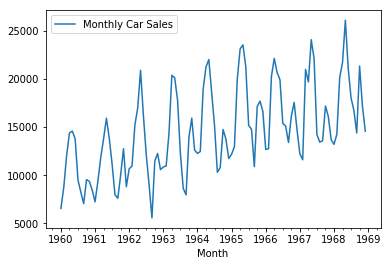

In [15]:
#Visualisng the dataset
data.plot()

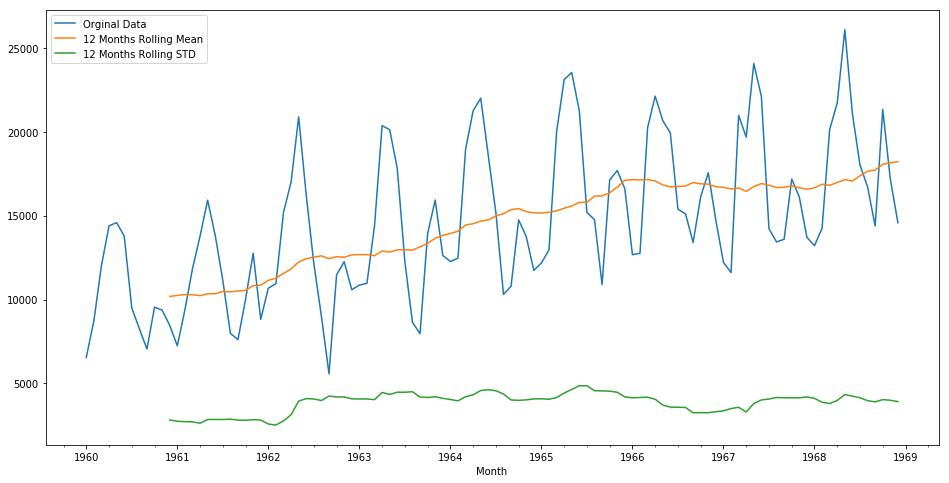

In [16]:
#Plotting the dataset along with 12 months Rolling Mean and STD
data['Monthly Car Sales'].plot(figsize=(16,8),label='Orginal Data')
data['Monthly Car Sales'].rolling(12).mean().plot(label='12 Months Rolling Mean')
data['Monthly Car Sales'].rolling(12).std().plot(label='12 Months Rolling STD')
plt.legend()

In [10]:
#pd.to_datetime(data['Month'])


In [17]:

from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
seasonal=seasonal_decompose(data['Monthly Car Sales'])

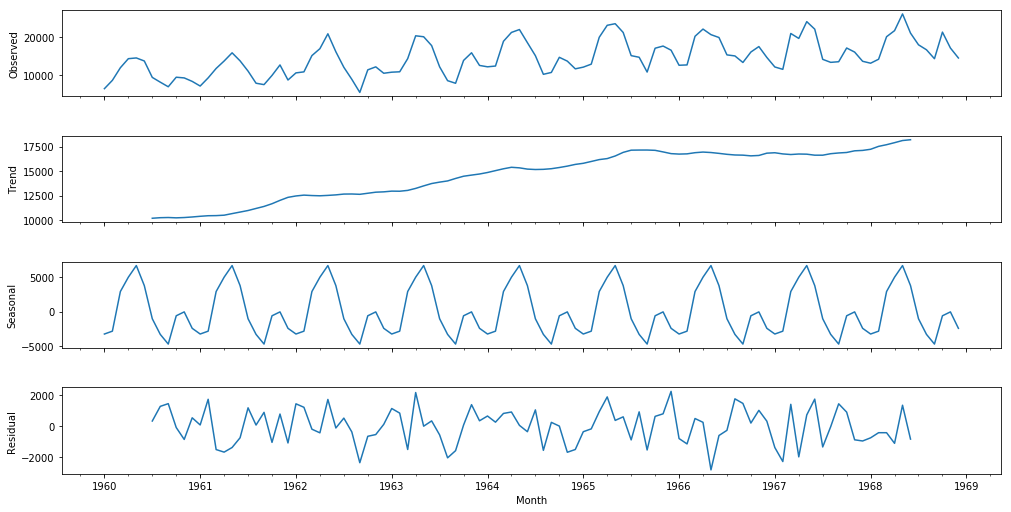

In [19]:
seasonal_plot=seasonal.plot()
seasonal_plot.set_size_inches(16,8)

In [21]:
#For Checking if our dataset is stationary or  not
from statsmodels.tsa.stattools import adfuller

In [22]:
#The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.
def adfuller_test(data):
    
    result=adfuller(data)
    
    print('Augemented Dicky Fuller Test Statistics')
    label=['ADF Test Statistics','P-Value','Number Of Lags','Number Of Observation Used']
    
    for label,value in zip(label,result):
        print(label+' : '+str(value))
    
    if result[1]<=0.05:
        print('Strong Evidence Against The Null Hypothesis')
        print('Reject The Null Hypothesis')
        print('Data Has No Unit Roots And Is Stationary')
        
    else:
        print('Weak Evidence Against The Null Hypothesis')
        print('Cannot Reject The Null Hypothesis')
        print('Data Has Unit Roots And Is Not Stationary')

In [23]:
#Appyling ADF Test on our datset
adfuller_test(data['Monthly Car Sales'])

Augemented Dicky Fuller Test Statistics
ADF Test Statistics : -1.2238127661752862
P-Value : 0.6632691049832858
Number Of Lags : 12
Number Of Observation Used : 95
Weak Evidence Against The Null Hypothesis
Cannot Reject The Null Hypothesis
Data Has Unit Roots And Is Not Stationary


In [24]:
#using the shift function to make the data stationary
data['First Difference']=data['Monthly Car Sales']-data['Monthly Car Sales'].shift(1)

In [27]:
#Droping the null value i.e the first value after applying the shift function on our dataset will become null.
#Again Appyling the ADF Test on our dataset after applying the Shift Function
adfuller_test(data['First Difference'].dropna())

Augemented Dicky Fuller Test Statistics
ADF Test Statistics : -6.199799230800695
P-Value : 5.8447525992768446e-08
Number Of Lags : 11
Number Of Observation Used : 95
Strong Evidence Against The Null Hypothesis
Reject The Null Hypothesis
Data Has No Unit Roots And Is Stationary


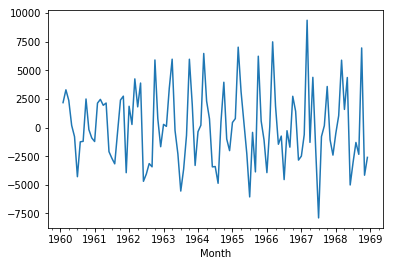

In [29]:
#Cheking Our New Dataset i.e Stationary Dataset as requrired by our model
data['First Difference'].plot()

In [45]:
#Importing The Auto Correleation Plot
#Our Main Priority here is deciding whether we will use the AR or MA component of the ARIMA model
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

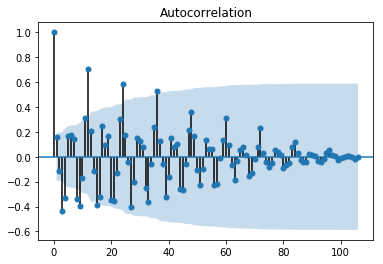

In [39]:
#Auto Correlation Plot
acf=plot_acf(data['First Difference'].dropna())

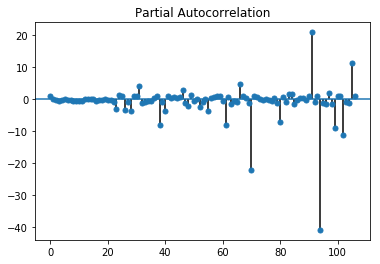

In [40]:
#Partial Auto Correlation Plot
pacf=plot_pacf(data['First Difference'].dropna())

In [46]:
#Importing the libraries to be used for ARIMA Model
import statsmodels.api as sm

In [42]:

model=sm.tsa.statespace.SARIMAX(data['Monthly Car Sales'],order=(0,1,0),seasonal_order=(1,1,1,12))

C:\Users\Vishal\Anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [47]:
#Fitting Our Model
result=model.fit()

In [48]:
#Checking the Summary of the result calculated by our ARIMA Model
print(result.summary())

                                 Statespace Model Results                                 
Dep. Variable:                  Monthly Car Sales   No. Observations:                  108
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -855.500
Date:                            Sat, 22 Dec 2018   AIC                           1716.999
Time:                                    21:15:14   BIC                           1724.661
Sample:                                01-01-1960   HQIC                          1720.095
                                     - 12-01-1968                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0442      0.262     -0.168      0.866      -0.558       0.470
ma.S.L12      -0.4973      0.229   

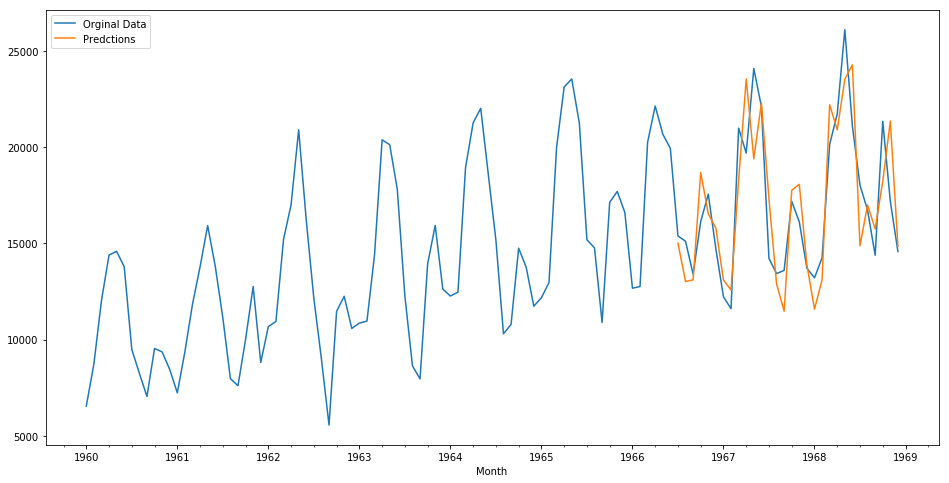

In [49]:
#Making The Past Prediction and Comapring it with the Original Data to check the accuracy of our model
data['Monthly Car Sales'].plot(figsize=(16,8),label='Orginal Data')
data['Future Predictions']=result.predict(start=78,end=108)
data['Future Predictions'].plot(label='Predctions')
plt.legend()

In [50]:
#Creating Dates for Making The Future Predictions
future_dates=[data.index[-1]+DateOffset(months=x) for x in range(1,49)]

In [51]:
df=pd.DataFrame(index=future_dates,columns=data.columns)

In [52]:
final_data=pd.concat([data,df],axis=0)

In [53]:
final_data.head()

,Monthly Car Sales,First Difference,Future Predictions
1960-01-01,6550.0,NaN,NaN
1960-02-01,8728.0,2178.0,NaN
1960-03-01,12026.0,3298.0,NaN
1960-04-01,14395.0,2369.0,NaN
1960-05-01,14587.0,192.0,NaN


In [54]:
#Making The Future Prediction Using Our ARIMA Model
final_data['Future Predictions']=result.predict(start=107,end=156)

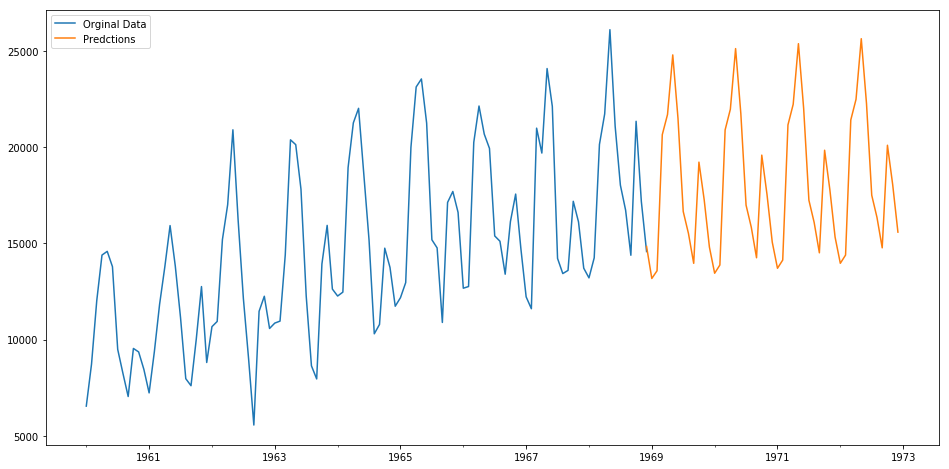

In [55]:
#Visualising The Prediction Made By Our Model
final_data['Monthly Car Sales'].plot(figsize=(16,8),label='Orginal Data')
final_data['Future Predictions'].plot(label='Predctions')
plt.legend()